# Data Visualization: World Happiness Report

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

## Import data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import math
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline

## Cleaning data
Cleaning the data for 2017, so that it can be alligned with 2015 and 2016 and renaming the columns 


In [ ]:
data_15 = pd.read_csv('2015.csv')
data_16 = pd.read_csv('2016.csv')
data_17 = pd.read_csv('2017.csv')

data_15 = pd.read_csv('2015.csv')
data_16 = pd.read_csv('2016.csv')
data_17 = pd.read_csv('2017.csv')

#Drop the columns to align with 2015, 2016 and 2017
data_15 = data_15.drop(['Standar Error'], axis =1), 
data_16 = data_16.drop(['Upper Confidence Interval',Lower Confidence Interval'], axis =1)
data_17 = data_17.drop(['Whisker.high','Whisker.low'], axis =1)
combine =[data_15,data_16,data_17]

# cleaning the data for 2017, so that it can be alinged with 2015 and 2016
data_17 = data_17.reindex_axis(['Country', 'Happiness.Rank', 'Happiness.Score',
       'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.',
       'Freedom', 'Trust..Government.Corruption.', 'Generosity',
       'Dystopia.Residual'], axis =1)
                        
#Rename the columns to align with eachother
data_17 = data_17.rename(columns={'Happiness.Rank': 'Happiness Rank', 'Happiness.Score': 'Happiness Score',
       'Economy..GDP.per.Capita.':'Economy (GDP per Capita)' , 'Health..Life.Expectancy.':'Health (Life Expectancy)' ,
       'Trust..Government.Corruption.':'Trust (Government Corruption)',
       'Dystopia.Residual':'Dystopia Residual'})
data_15 = data_15.rename(columns={'Economy (GDP per Capita)': 'Economy', 'Health (Life Expectancy)': 'Health',
       'Happiness Score':'Score' , 'Happiness Rank':'Rank' ,
       'Trust (Government Corruption)':'Trust',
       'Dystopia Residual':'Residual'})
data_16 = data_16.rename(columns={'Economy (GDP per Capita)': 'Economy', 'Health (Life Expectancy)': 'Health',
       'Happiness Score':'Score' , 'Happiness Rank':'Rank' ,
       'Trust (Government Corruption)':'Trust',
       'Dystopia Residual':'Residual'})
data_17 = data_17.rename(columns={'Economy (GDP per Capita)': 'Economy', 'Health (Life Expectancy)': 'Health',
       'Happiness Score':'Score' , 'Happiness Rank':'Rank' ,
       'Trust (Government Corruption)':'Trust',
       'Dystopia Residual':'Residual'})


In [3]:
sns.set(style="whitegrid", palette="muted")
current_palette = sns.color_palette()
df = pd.read_csv("2016.csv")
df.head(50)

df2015 = pd.read_csv("2015.csv")

In [6]:
df.Region.unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [5]:
df2015['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64

## Correlation 

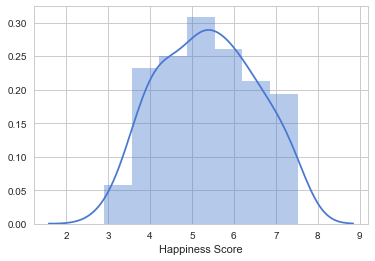

In [2]:
sns.distplot(df['Happiness Score'])

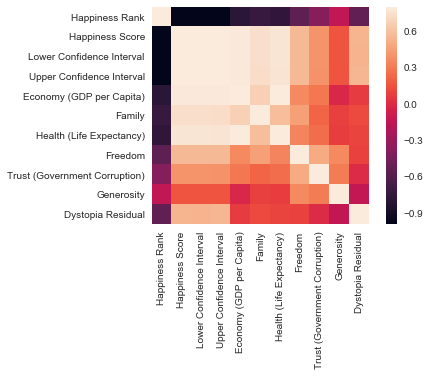

In [3]:
corrmat = df.corr()
sns.heatmap(corrmat, vmax=.8, square=True)

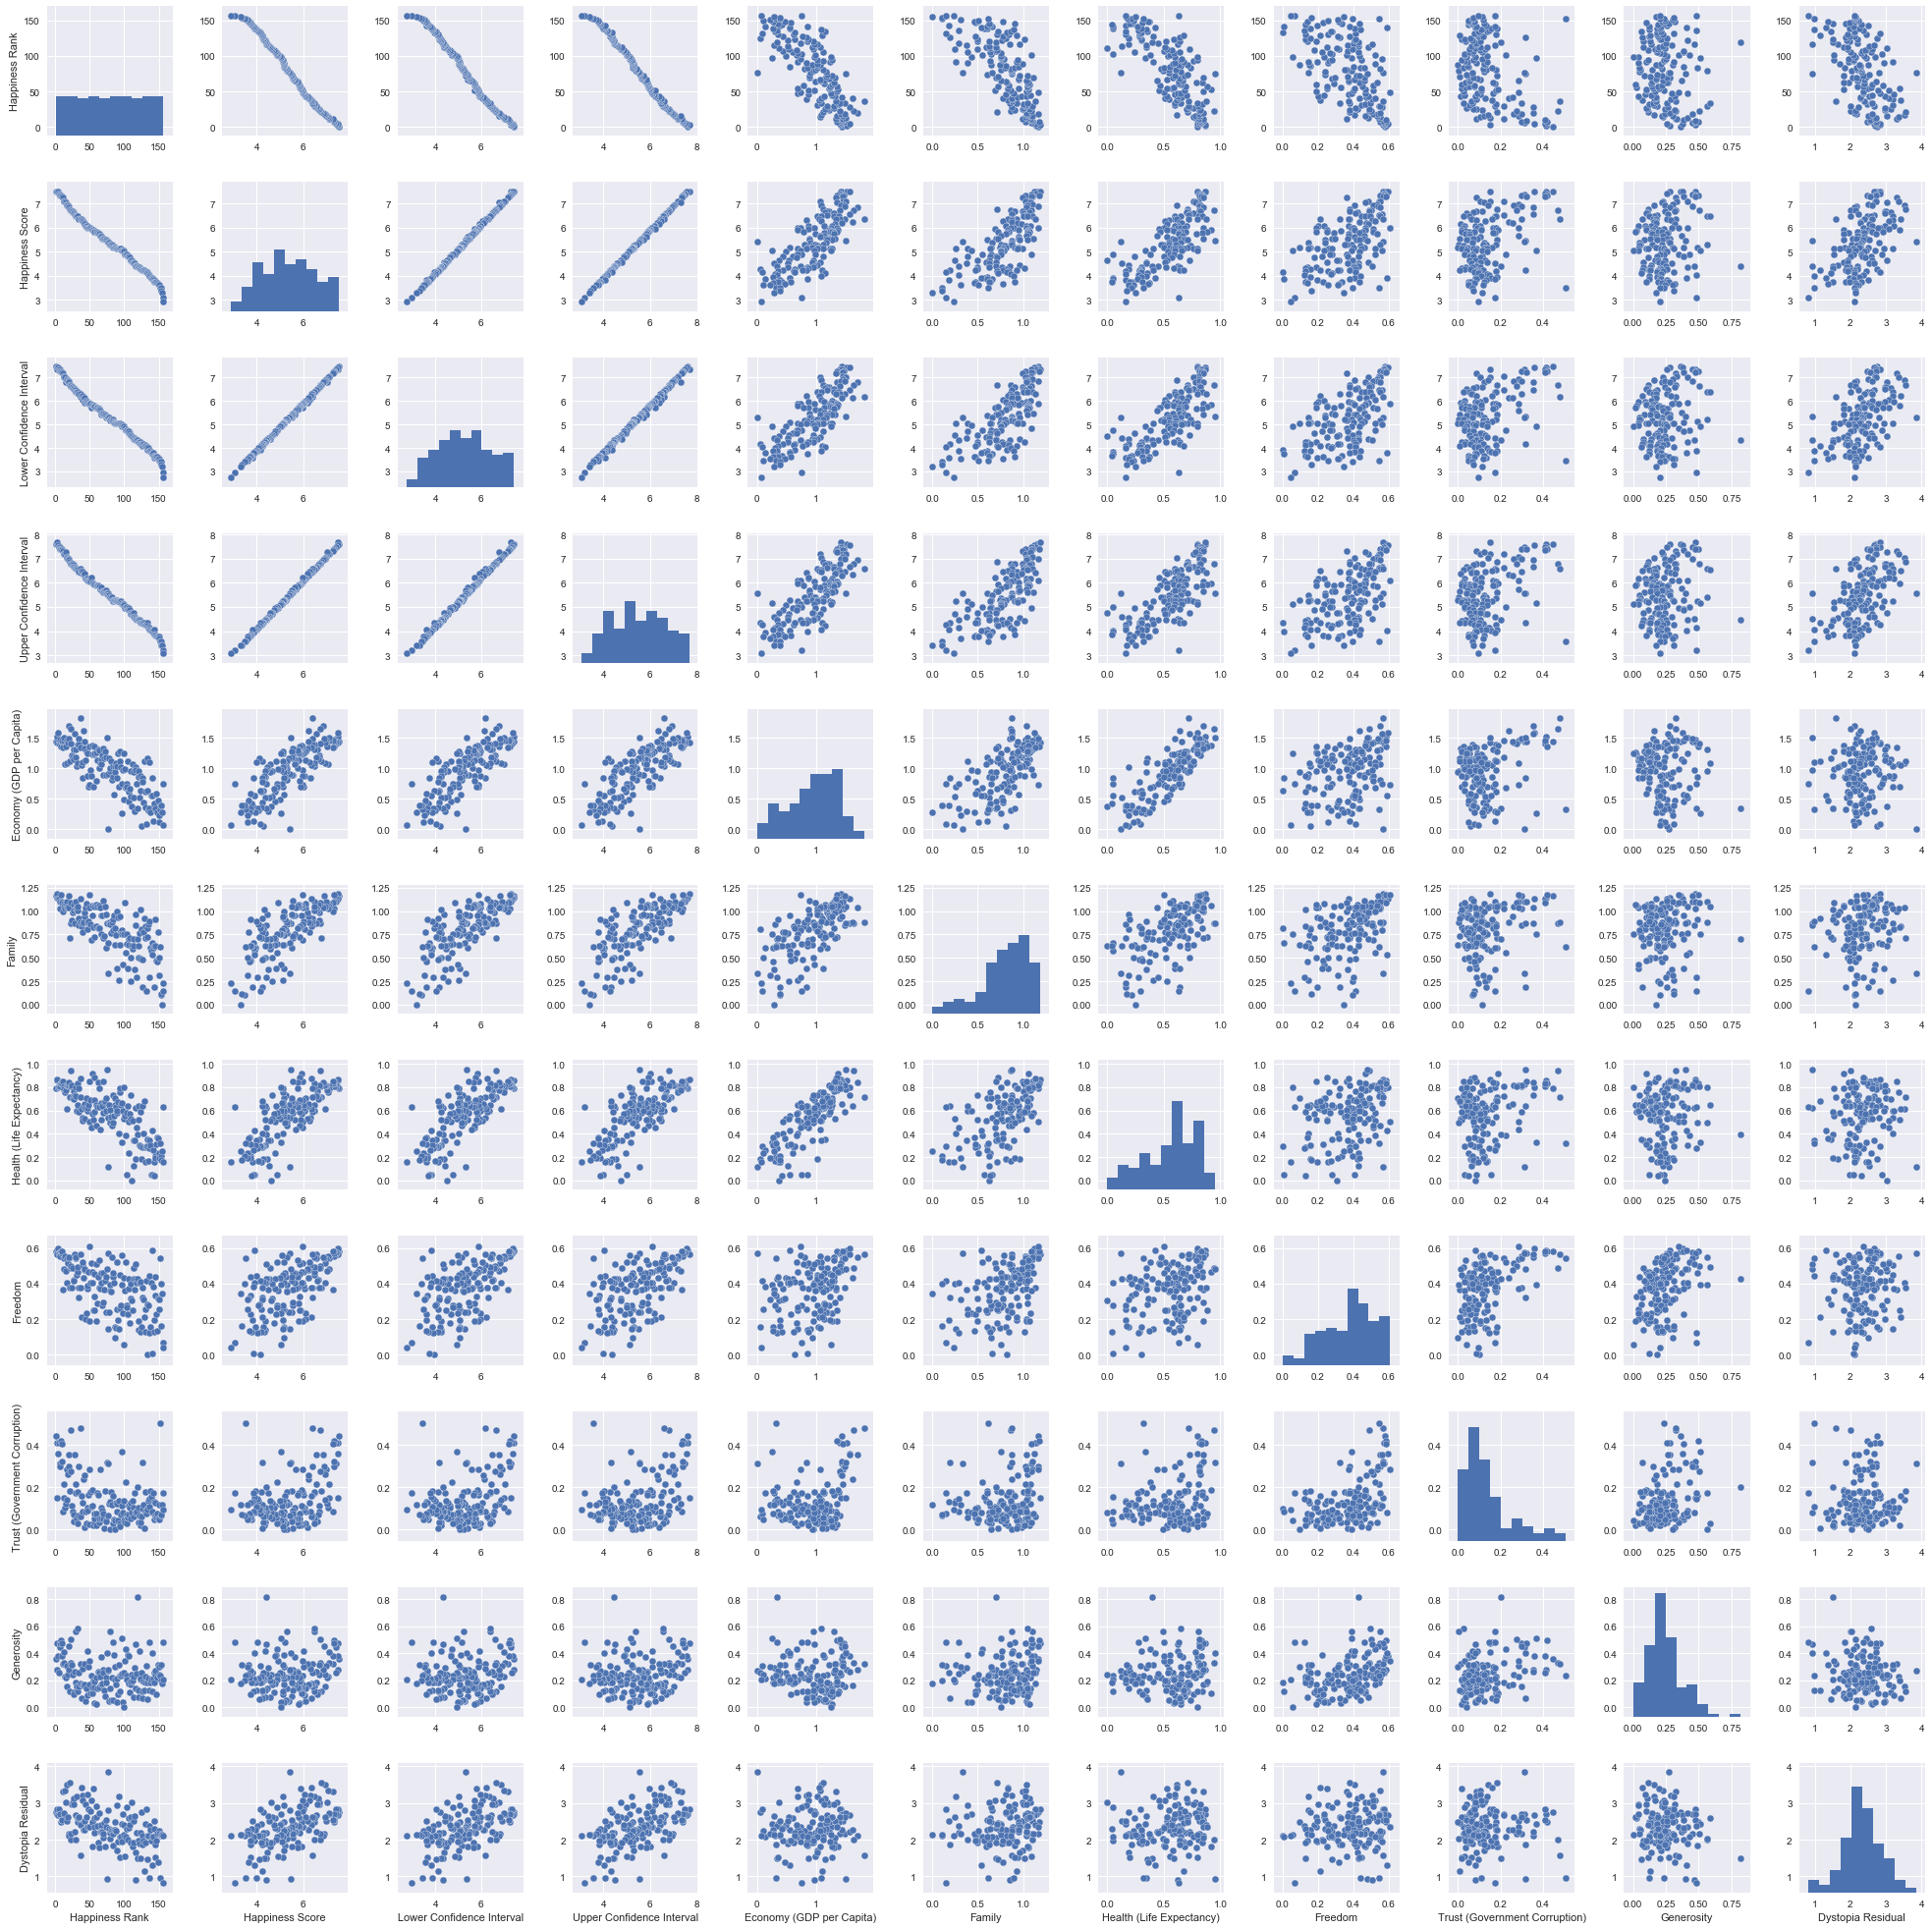

In [4]:
sns.set()
sns.pairplot(df, size = 2.5)
plt.show();

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

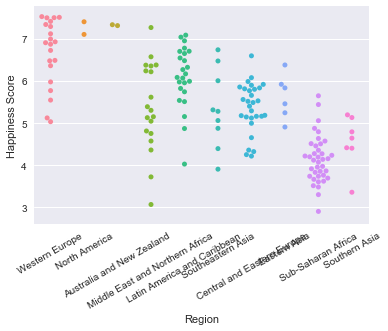

In [5]:
sns.swarmplot(x="Region", y="Happiness Score",  data=df)
plt.xticks(rotation=30)

## Regional ranking

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

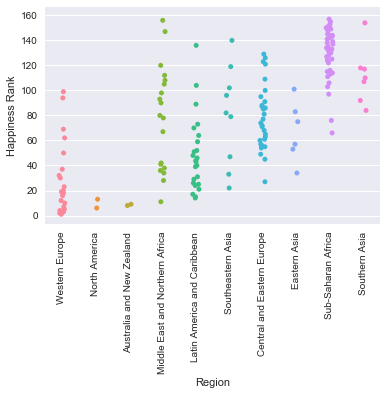

In [6]:
g = sns.stripplot(x="Region", y="Happiness Rank", data=df, jitter=True)
plt.xticks(rotation=90)

In [7]:
w_europe = df[df.Region=='Western Europe']
ec_europe = df[df.Region=='Central and Eastern Europe']
europe = pd.concat([w_europe,ec_europe],axis=0)
europe


,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
6,Netherlands,Western Europe,7,7.339,7.284,7.394,1.46468,1.02912,0.81231,0.55211,0.29927,0.47416,2.70749
9,Sweden,Western Europe,10,7.291,7.227,7.355,1.45181,1.08764,0.83121,0.58218,0.40867,0.38254,2.54734
11,Austria,Western Europe,12,7.119,7.045,7.193,1.45038,1.08383,0.80565,0.54355,0.21348,0.32865,2.69343
15,Germany,Western Europe,16,6.994,6.930,7.058,1.44787,1.09774,0.81487,0.53466,0.28551,0.30452,2.50931
17,Belgium,Western Europe,18,6.929,6.861,6.997,1.42539,1.05249,0.81959,0.51354,0.26248,0.24240,2.61355


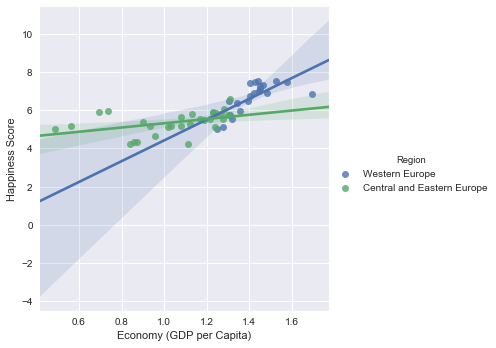

In [8]:
sns.lmplot(data=europe,x='Economy (GDP per Capita)',y='Happiness Score',hue="Region")

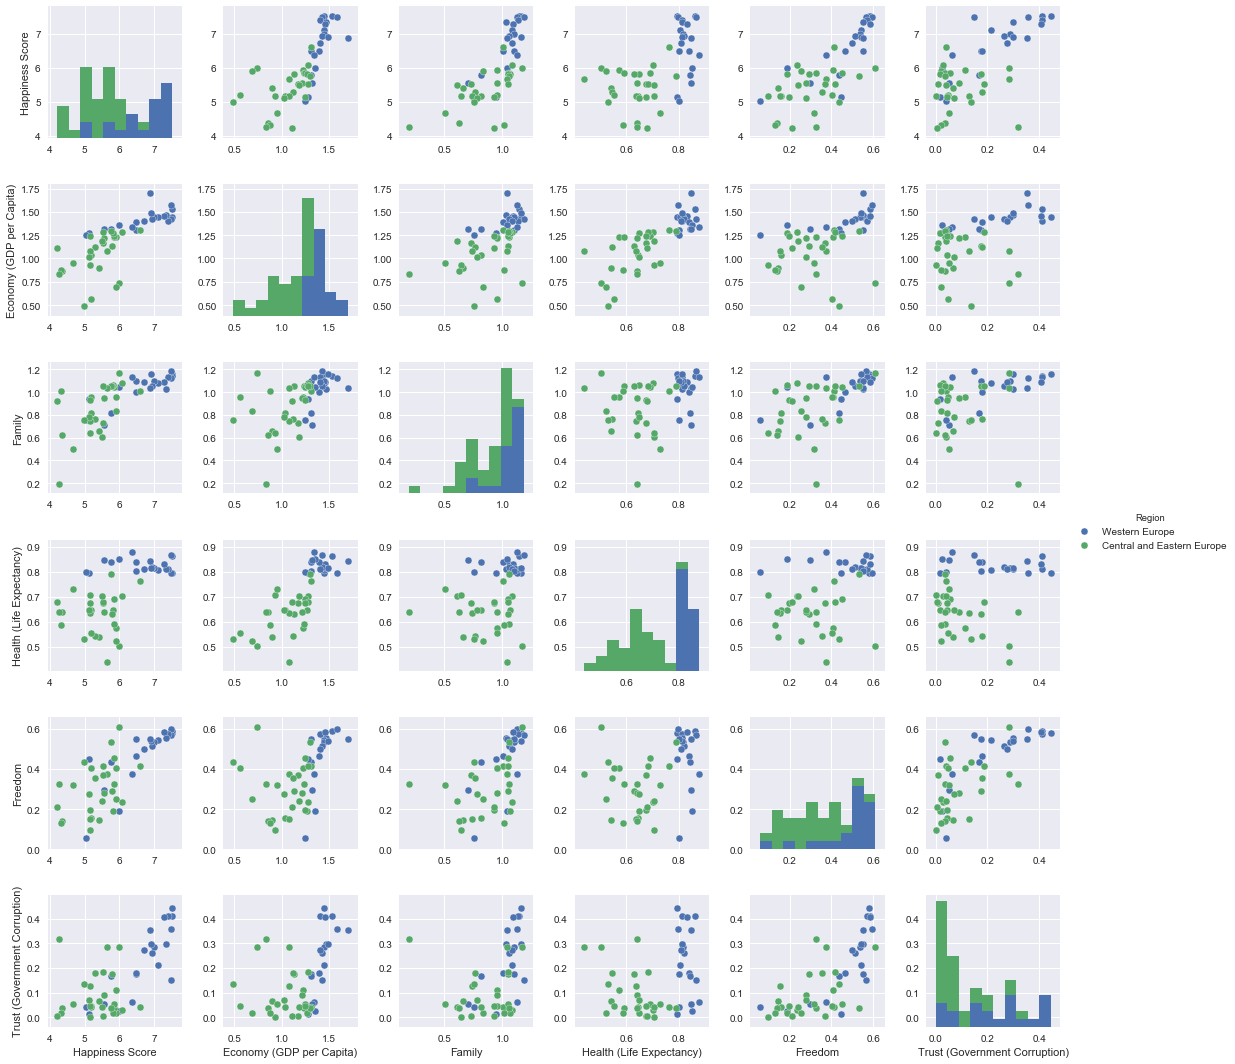

In [9]:
selectCols=  ['Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Region']
sns.pairplot(europe[selectCols], hue='Region',size=2.5)

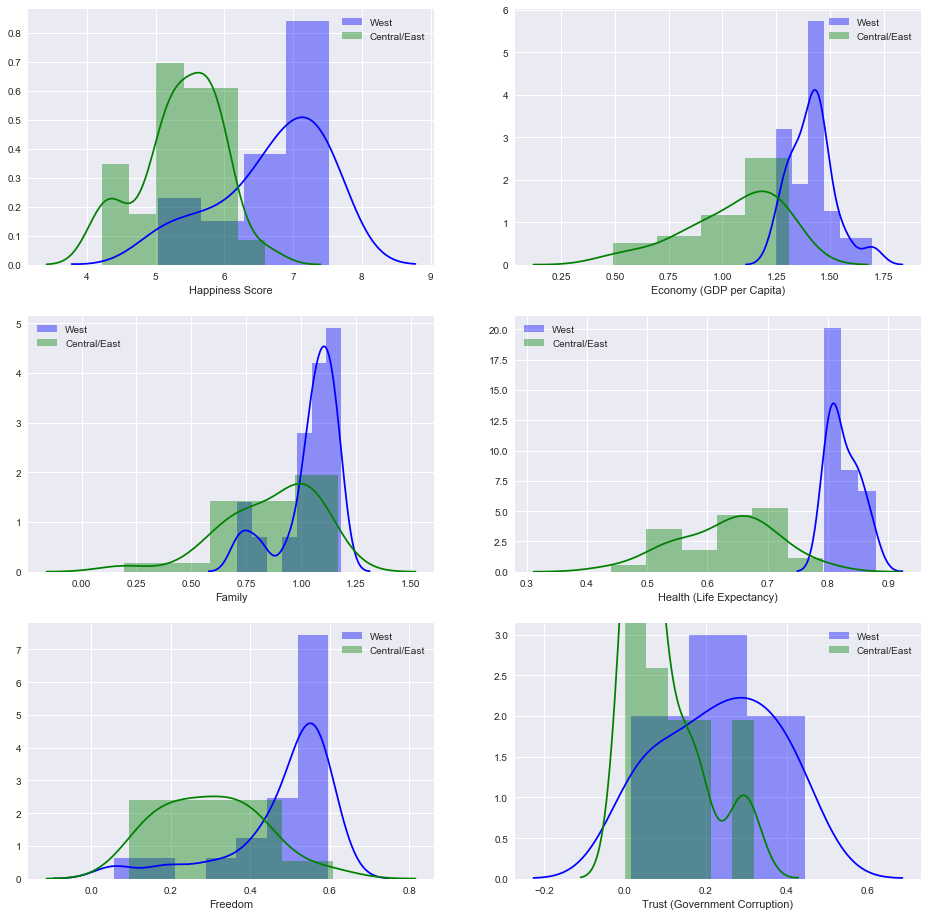

In [10]:
f, axes = plt.subplots(3, 2, figsize=(16, 16))
axes = axes.flatten()
compareCols = ['Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)']
for i in range(len(compareCols)):
    col = compareCols[i]
    axi = axes[i]
    sns.distplot(w_europe[col],color='blue' , label='West', ax=axi)
    sns.distplot(ec_europe[col],color='green', label='Central/East',ax=axi)
    axi.legend()

In [11]:
def plot_compare(df,regions,compareCols):
    n = len(compareCols)
    f, axes = plt.subplots(math.ceil(n/2), 2, figsize=(16, 6*math.ceil(n/2)))
    axes = axes.flatten()
    #compareCols = ['Happiness Score','Economy','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)']
    for i in range(len(compareCols)):
        col = compareCols[i]
        axi = axes[i]
        for region in regions:
            this_region = df[df['Region']==region]
            sns.distplot(this_region[col], label=region, ax=axi)
        axi.legend()

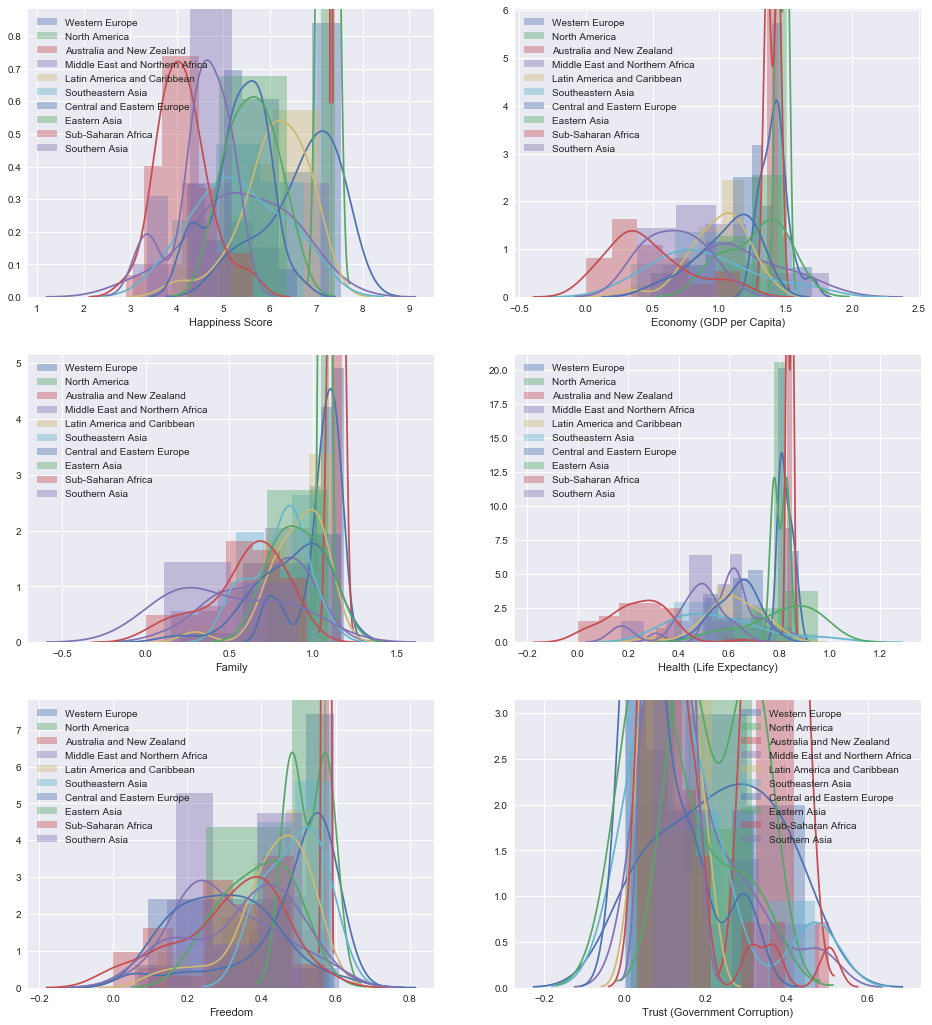

In [12]:
plot_compare(df,['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'],['Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)'])

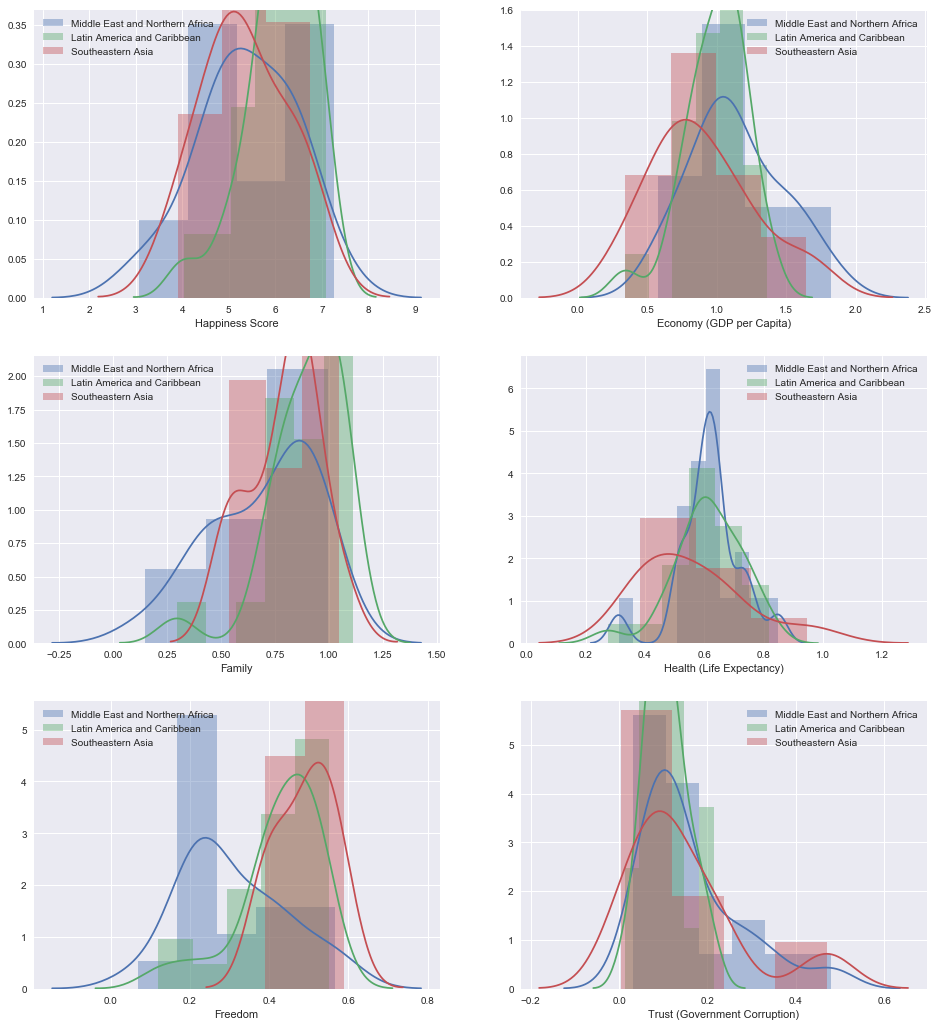

In [13]:
regions = [
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia']
selectCol = ['Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)']
plot_compare(df,regions,selectCol)


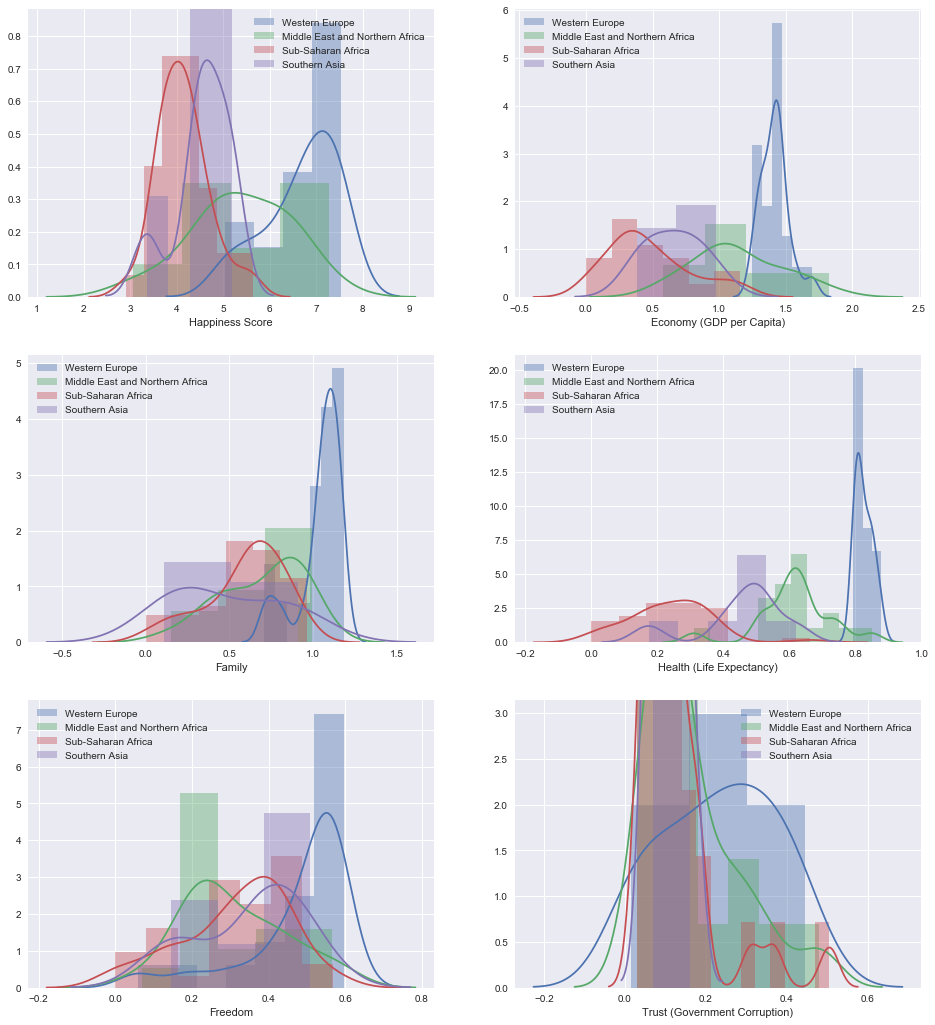

In [14]:
regions = ['Western Europe', 'Middle East and Northern Africa',
       'Sub-Saharan Africa', 'Southern Asia']
selectCol = ['Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)']
plot_compare(df,regions,selectCol)

## Global ranking
## Happiness in the World

In [4]:
data = dict(type = 'choropleth', 
           locations = df['Country'],
           locationmode = 'country names',
           z = df['Happiness Rank'], 
           text = df['Country'],
           colorbar = {'title':'Happiness'})
layout = dict(title = 'Global Happiness', 
             geo = dict(showframe = False, 
                       projection = {'type': 'Mercator'}))
choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)